# Visualization module example demo notebook

## Objective

This notebook presents a small usage example for the visualization of ChangeEvent objects. A ChangeEvent objects represents an event of change which has been extracted from point cloud time series data using different change methods. To run this notebook it is recommended to clone [this repository}](https://github.com/3dgeo-heidelberg/py4dgeo/tree/visualization_module) to a local directory on your computer.

## Data
The module takes a GeoJSON defining visualization parameters a GeoJSON containing metadata for ChangeEvents as input. A small test dataset used in this notebook is downloaded from [this folder](https://heibox.uni-heidelberg.de/f/7eaf90f07b8b4f748c23/). The dataset represents a rockfall event recorded in three subsequent epochs of a point cloud time series.

You can use your own anaconda environment or generate a new one using the `py4dgeo/visualization.yml` file.

First, we start by setting up the Python environment. 

In [1]:
# import required modules
import os
import numpy as np
import shutil
import requests
import tempfile
import zipfile
import sys
from pathlib import Path

Next, the test data used in this notebook is downloaded to a temporary local directory.

In [2]:
# url for download of data
url = "https://heibox.uni-heidelberg.de/f/7eaf90f07b8b4f748c23/?dl=1"

# path to subfolder with dataset used in this notebook
subdir_path = "visualization_module_test_data"

# generate temporary directory for data
temp_dir = tempfile.mkdtemp()

try:
    # download data
    response = requests.get(url)
    response.raise_for_status()

    # store zip archive in temp dir
    zip_path = os.path.join(temp_dir, "visualization_module_test_data.zip")
    with open(zip_path, "wb") as zip_file:
        zip_file.write(response.content)
    
    # unpack zip archive in subfolder
    with zipfile.ZipFile(zip_path, "r") as zip_ref:

        file_list = [f for f in zip_ref.namelist() if f.startswith(subdir_path)]
        zip_ref.extractall(temp_dir, members=file_list)

    # specify data path
    data_path = os.path.join(temp_dir, subdir_path)
    print(f'Data stored at temp folder: {data_path}')

except requests.exceptions.RequestException as e:
    print(f"Failed to download data: {e}")
except zipfile.BadZipFile as e:
    print(f"Failed to unpack data: {e}")

# check if the specified path exists
if not os.path.isdir(data_path):
    print(f'ERROR: {data_path} does not exist')
    print('Please specify the correct path to the data directory by replacing <path-to-data> above.')

# sub-directory containing the point clouds
visualization_parameters_filepath = os.path.join(data_path, 'visualization_parameters.json')
change_events_data_filepath = os.path.join(data_path, 'change_events.json')

Data stored at temp folder: C:\Users\ep413\AppData\Local\Temp\tmpeq2f8lox\visualization_module_test_data


## Loading input data
Now we can run the workflow for visualizing the change events objects. First, we will read the visualization parameters and generate ChangeEvent objects from externally provided GeoJSON files.

In [3]:
# append system path by directory of visualization module (to be replaced)
sys.path.append(str(Path(os.getcwd()).parent / "src" / "py4dgeo"))
import visualization

# Read visualization parameters 
visualization_parameters_json = visualization_parameters_filepath
visualization_parameters = visualization.read_visualization_parameters(visualization_parameters_json)

# Generate ChangeEvent objects
change_events_geojson = change_events_data_filepath
change_events = visualization.ChangeEvent.read_change_events_from_geojson(change_events_geojson)
print(f'{len(change_events)} ChangeEvent object(s) generated: {change_events}')

2 ChangeEvent object(s) generated: [<visualization.ChangeEvent object at 0x0000020EBE5EE0D0>, <visualization.ChangeEvent object at 0x0000020EBE5EED90>]


## Filtering relevant ChangeEvent objects
Next, we filter ChangeEvent objects which meet the criteria defined in the visualization parameter file.

In [4]:
# filter relevant ChangeEvent objects for visualization
# in this dataset, only 1 ChangeEvent object fullfills the criteria
relevant_change_events = visualization.filter_relevant_events(change_events, visualization_parameters) 
print(f'{len(relevant_change_events)} ChangeEvent object(s) filtered for visualization: {relevant_change_events}')

1 ChangeEvent object(s) filtered for visualization: [<visualization.ChangeEvent object at 0x0000020EBE5EE0D0>]


## Change visualization
Finally, we visualize the filtered ChangeEvent objects according to the visualization modes defined in the visualization parameters input file. Additionally, all generated plots are stored in `.../output_visualization` relative to the notebook's local directory.

output_visualization\2d_plots\001
output_visualization\2d_plots\001\plot2d_001_timestamps_change_magnitudes.png


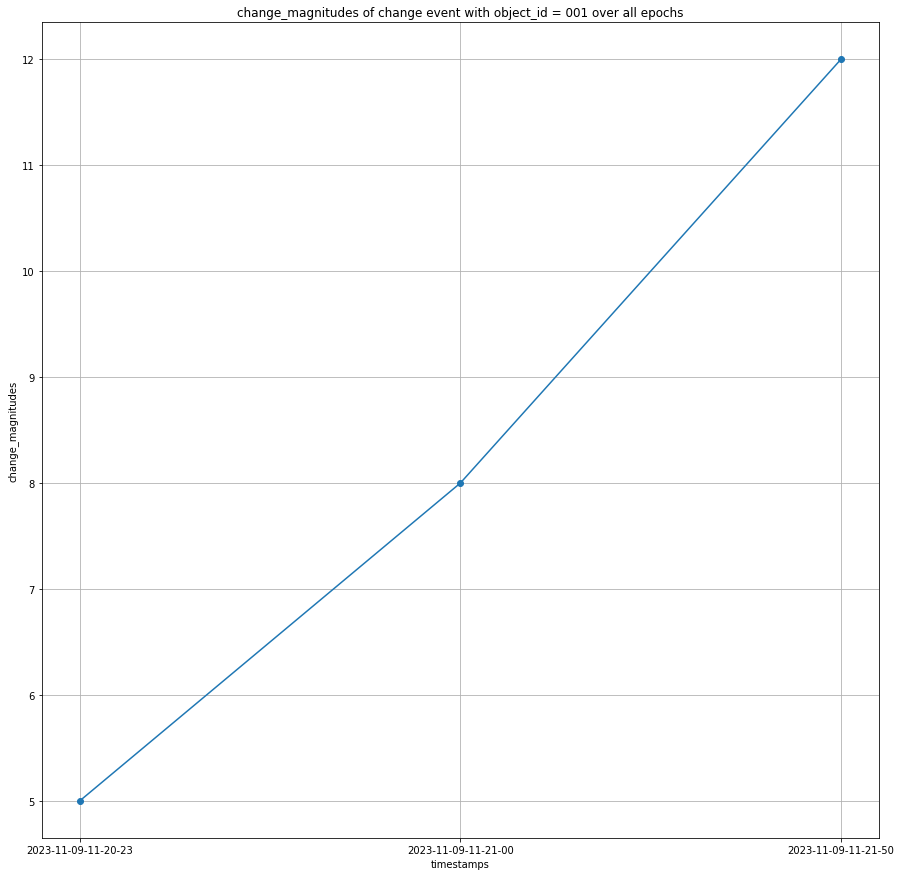

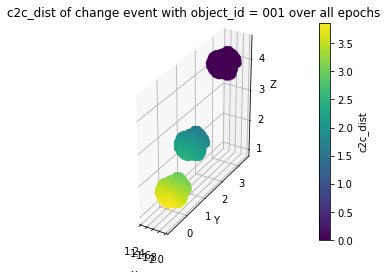

In [5]:
# plot ChangeEvent objects as defined in visualization parameters 
for change_event in relevant_change_events:
    change_event.visualize_change_event(visualization_parameters) # depending on "visualization_mode" parameter 
    # change_event.write_change_event_in_geojson(change_events)